In [304]:
import sys
sys.path.append("../src")
import numpy as np
import matlab.engine
import tweezer_force
from constants import um, mW, fN, pN, nm
import matplotlib.pyplot as plt
from importlib import reload

In [305]:
reload(tweezer_force)
from tweezer_force import Domain, Tweezers

In [239]:
C = Tweezers(wavelength0=1064*nm, n_medium=1.0)
C.make_Tmatrix(R=1.585*um, n_particle=1.2)
C.make_beam(name="F", power=70*mW, NA=0.70, polarization=[1, 0], angle=0.0)
C.make_beam(name="B", power=70*mW, NA=0.70, polarization=[0, 1], angle=180.0)
C.make_domain(xmin=-2*um, xmax = 2*um, Nx=9,
              ymin=-1*um, ymax = 1*um, Ny=10,
              zmin=-3*um, zmax = 3*um, Nz=11)
C.evaluate_force(name="F", offset=[0*um, 0*um, 0*um])
C.evaluate_force(name="B", offset=[0, 0,  0*um])
C.evaluate_net_force()
C.make_interpolation(name="net")
C.save()

Data and parameters saved to:
/home/lhillber/documents/research/brownian/data/b698c9a1945e367e098d8ae232dfd471bba6b4f8


In [245]:
C.domain.grid.shape

(3, 9, 10, 11)

In [412]:
reload(tweezer_force)
from tweezer_force import Domain, Tweezers
C = Tweezers()
C.load("../data/b698c9a1945e367e098d8ae232dfd471bba6b4f8")

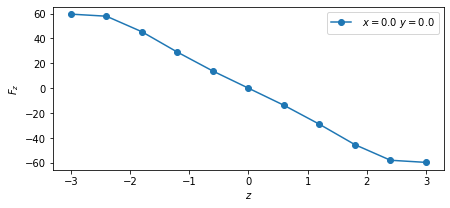

In [413]:
component = "z"
line = [0, 0, "*"]

fig, axs = C.plot_linecut(component=component, 
                          line=line,
                          unit=um,
                          F_unit=pN,
                          marker="o")

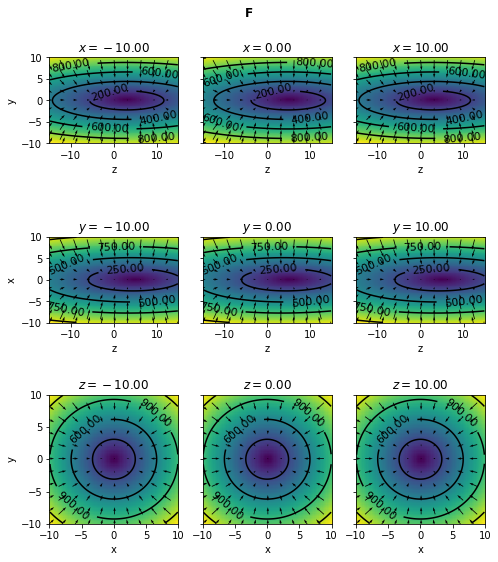

In [424]:
C.plot_slices(domain=Domain([[-10*nm, 10*nm, 100],
                             [-10*nm, 10*nm, 100],
                             [-15*nm, 15*nm, 100]]), unit=nm, 
              F_unit=fN, skip=10, planes={"x":[-10*nm, 0*nm, 10*nm],
                                         "y":[-10*nm, 0*nm, 10*nm],
                                         "z":[-10*nm, 0*nm, 10*nm]});
plt.tight_layout()

(<Figure size 504x576 with 1 Axes>,
 <AxesSubplot:title={'center':'$x = 0.00$'}, xlabel='z', ylabel='y'>)

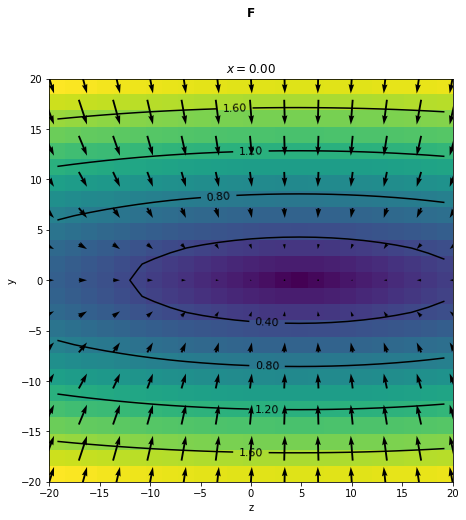

In [421]:
C.plot_slices(domain=Domain([[-20*nm, 20*nm, 25]]*3), unit=nm, F_unit=pN, skip=2, planes={"x":[0*nm]})

In [81]:
from scipy.optimize import curve_fit

def spring_potential(x, k):
    return 0.5 * k * x*x


x, dfxdx = X[:,Ny//2, Nz//2][1:], -np.diff(Fx[:, Ny//2, Nz//2])
x = (x - dx/2) / nm
dfxdx = (dfxdx - np.min(dfxdx)) / fN
mask = np.logical_and(x < 100, x > -100)

popt, pcov = curve_fit(spring_potential, x[mask], dfxdx[mask])
plt.plot(x, dfxdx)
plt.plot(x, spring_potential(x, *popt))

NameError: name 'X' is not defined

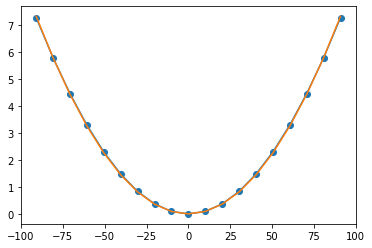

In [9]:
plt.plot(x[mask], dfxdx[mask], marker="o")
plt.plot(x[mask], spring_potential(x[mask], *popt))

In [10]:
popt[0]

0.0017747498358044833

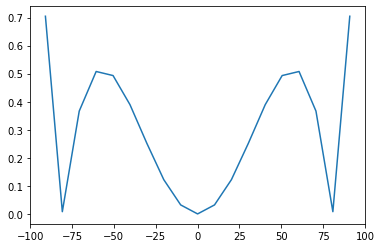

In [11]:
plt.plot(x[mask], 100*np.abs(dfxdx[mask] - spring_potential(x[mask], *popt))/np.max(dfxdx[mask]))

In [38]:
p = "home/lhillber/scratch/file.npy"
path.dirname(p)

'home/lhillber/scratch'

In [34]:
from os import path

In [40]:
path.normpath

<function posixpath.normpath(path)>

In [90]:
def f(a, b, c, d):
    return a+b+c+d

In [94]:
f(*((1,2),*(2,3)))

TypeError: f() missing 1 required positional argument: 'd'